In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobiles-dataset-2025/Mobiles Dataset (2025).csv


In [2]:
df = pd.read_csv('/kaggle/input/mobiles-dataset-2025/Mobiles Dataset (2025).csv', encoding="latin1")
df

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,Poco,Pad 5G 128GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,"PKR 66,220","INR 23,999","CNY 2,099",USD 280,"AED 1,029",2024
926,Poco,Pad 5G 256GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,"PKR 71,220","INR 25,999","CNY 2,299",USD 300,"AED 1,099",2024
927,Samsung,Galaxy Z Fold6 256GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"PKR 604,999","INR 164,999","¥13,999","USD 1,899","AED 7,199",2024
928,Samsung,Galaxy Z Fold6 512GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"PKR 544,999","INR 176,999","CNY 15,999",USD 1719,"AED 7,699",2024


In [3]:
df.columns.tolist()

['Company Name',
 'Model Name',
 'Mobile Weight',
 'RAM',
 'Front Camera',
 'Back Camera',
 'Processor',
 'Battery Capacity',
 'Screen Size',
 'Launched Price (Pakistan)',
 'Launched Price (India)',
 'Launched Price (China)',
 'Launched Price (USA)',
 'Launched Price (Dubai)',
 'Launched Year']

In [4]:
df = df.rename(columns={"Launched Price (Pakistan)": "PKR", "Launched Price (India)": "INR", "Launched Price (China)": "CNY", "Launched Price (USA)": "USD", "Launched Price (Dubai)": "DIR"})

In [5]:
df['Company Name'].unique()

array(['Apple', 'Samsung', 'OnePlus', 'Vivo', 'iQOO', 'Oppo', 'Realme',
       'Xiaomi', 'Lenovo', 'Motorola', 'Huawei', 'Nokia', 'Sony',
       'Google', 'Tecno', 'Infinix', 'Honor', 'POCO', 'Poco'],
      dtype=object)

In [6]:
df[df.eq("POCO").any(axis=1)]

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,PKR,INR,CNY,USD,DIR,Launched Year
895,POCO,F2 Pro 128GB,219g,6GB,20MP,64MP,Snapdragon 865,4700mAh,6.67 inches,"PKR 99,999","INR 37,999","CNY 2,999",USD 499,"AED 1,999",2020
896,POCO,M2 Pro 64GB,209g,4GB,16MP,48MP,Snapdragon 720G,5000mAh,6.67 inches,"PKR 34,999","INR 13,999","CNY 1,399",USD 199,AED 799,2020
897,POCO,X3 NFC 128GB,215g,6GB,20MP,64MP,Snapdragon 732G,5160mAh,6.67 inches,"PKR 39,999","INR 16,999","CNY 1,599",USD 229,AED 899,2020
898,POCO,M3 64GB,198g,4GB,8MP,48MP,Snapdragon 662,6000mAh,6.53 inches,"PKR 24,999","INR 10,999",CNY 999,USD 149,AED 599,2020
899,POCO,F3 128GB,196g,6GB,20MP,48MP,Snapdragon 870,4520mAh,6.67 inches,"PKR 69,999","INR 29,999","CNY 2,499",USD 349,"AED 1,399",2021
900,POCO,X3 Pro 128GB,215g,6GB,20MP,48MP,Snapdragon 860,5160mAh,6.67 inches,"PKR 49,999","INR 18,999","CNY 1,799",USD 249,AED 999,2021
901,POCO,M3 Pro 5G 64GB,190g,4GB,8MP,48MP,MediaTek Dimensity 700,5000mAh,6.5 inches,"PKR 29,999","INR 13,999","CNY 1,199",USD 199,AED 799,2021
902,POCO,F3 GT 128GB,205g,6GB,16MP,64MP,MediaTek Dimensity 1200,5065mAh,6.67 inches,"PKR 79,999","INR 25,999","CNY 2,299",USD 399,"AED 1,499",2021
903,POCO,X3 GT 128GB,193g,6GB,16MP,64MP,MediaTek Dimensity 1100,5000mAh,6.6 inches,"PKR 44,999","INR 21,999","CNY 1,899",USD 279,"AED 1,099",2021
904,POCO,M4 Pro 5G 128GB,195g,4GB,16MP,50MP,MediaTek Dimensity 810,5000mAh,6.6 inches,"PKR 34,999","INR 14,999","CNY 1,499",USD 219,AED 849,2021


In [7]:
df[df.eq("Poco").any(axis=1)]

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,PKR,INR,CNY,USD,DIR,Launched Year
925,Poco,Pad 5G 128GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,"PKR 66,220","INR 23,999","CNY 2,099",USD 280,"AED 1,029",2024
926,Poco,Pad 5G 256GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,"PKR 71,220","INR 25,999","CNY 2,299",USD 300,"AED 1,099",2024


In [8]:
df["Company Name"] = df["Company Name"].replace("Poco", "POCO")

In [9]:
df['RAM'].unique()

array(['6GB', '8GB', '4GB', '3GB', '12GB', '2GB', '1.5GB', '16GB', '10GB',
       '1GB', '8GB / 12GB'], dtype=object)

In [10]:
df['Front Camera'].unique()

array(['12MP', '12MP / 4K', '7MP', '10MP', '32MP', '13MP', '5MP', '16MP',
       '8MP', '12MP + 12MP', '2MP', '44MP', '24MP', '20MP+8MP', '20MP',
       '50MP', '25MP', '60MP', '10.7MP', 'Dual 32MP', 'Dual 60MP',
       '60MP (ultrawide) + 8MP (telephoto)', '60MP + 8MP', '11.1MP',
       '10.8MP', '10.5MP', '48MP', '42MP', '10MP, 4MP (UDC)'],
      dtype=object)

In [11]:
df['Back Camera'].unique()

array(['48MP', '50MP + 12MP', '48MP + 12MP', '12MP + 12MP', '12MP',
       '12MP + 12MP + 12MP', '8MP', '12MP + 10MP', '200MP + 12MP',
       '108MP + 12MP', '48MP + 8MP', '50MP + 5MP', '50MP + 2MP',
       '108MP + 8MP', '50MP + 8MP', '13MP + 2MP', '12MP + 16MP', '50MP',
       '16MP', '16MP + 5MP', '13MP', '13MP + 5MP', '16MP + 8MP',
       '13MP + 8MP', '13MP + 6MP', '5MP', '50MP + 48MP', '108MP',
       '64MP + 2MP', '48MP + 48MP', '48MP + 50MP', '48MP + 16MP',
       '48MP + 5MP', '64MP + 8MP', '20MP + 16MP', '16MP + 20MP',
       '50MP + 16MP', '200MP', '64MP', '13MP+2MP', '48MP + 64MP + 48MP',
       '50MP + 32MP + 48MP', '50MP + 50MP + 50MP', '50MP + 50MP',
       '50MP + 8MP + 2MP', '50MP + 50MP + 8MP', '50MP + 32MP + 8MP',
       '64MP + 8MP + 2MP', '8MP + 2MP', '50MP + 50MP + 64MP',
       '50MP + 50MP + 13MP', '50MP + 48MP + 32MP', '64MP + 32MP + 8MP',
       '50MP + 64MP + 8MP', '64MP + 8MP + 2MP + 2MP',
       '50MP + 13MP + 16MP + 2MP', '50MP + 16MP + 13MP + 2MP',
      

In [12]:
df['Battery Capacity'].unique()

array(['3,600mAh', '4,200mAh', '4,400mAh', '4,500mAh', '3,200mAh',
       '4,300mAh', '4,325mAh', '2,438mAh', '3,240mAh', '3,095mAh',
       '4,352mAh', '2,227mAh', '2,815mAh', '3,687mAh', '3,110mAh',
       '3,046mAh', '3,969mAh', '2,716mAh', '2,658mAh', '3,174mAh',
       '2,942mAh', '7,608mAh', '8,612mAh', '5,124mAh', '7,812mAh',
       '9,720mAh', '10,307mAh', '5000mAh', '4800mAh', '4000mAh',
       '4700mAh', '3900mAh', '4500mAh', '3800mAh', '4400mAh', '3700mAh',
       '6000mAh', '4300mAh', '3500mAh', '4050mAh', '3000mAh', '3600mAh',
       '3300mAh', '2600mAh', '11200mAh', '10090mAh', '8400mAh', '8000mAh',
       '7040mAh', '5100mAh', '5050mAh', '7600mAh', '4510mAh', '4115mAh',
       '4085mAh', '9510mAh', '11000mAh', '5700mAh', '4100mAh', '3315mAh',
       '3260mAh', '2300mAh', '3055mAh', '4030mAh', '2000mAh', '3200mAh',
       '4200mAh', '4450mAh', '4600mAh', '4830mAh', '4870mAh', '8040mAh',
       '4805mAh', '5800mAh', '5600mAh', '6400mAh', '8360mAh', '4520mAh',
       '5,000

In [13]:
df['Screen Size'].unique()

array(['6.1 inches', '6.7 inches', '5.4 inches', '5.8 inches',
       '6.5 inches', '10.9 inches', '10.2 inches', '7.9 inches',
       '11 inches', '12.9 inches', '13 inches', '6.8 inches',
       '6.6 inches', '7.6 inches', '6.4 inches', '6.9 inches',
       '6.3 inches', '5.3 inches', '6.0 inches', '5.5 inches',
       '5.7 inches', '5.2 inches', '14.6 inches', '12.4 inches',
       '8.7 inches', '10.5 inches', '8 inches', '10.1 inches',
       '6.74 inches', '6.72 inches', '7.8 inches', '6.55 inches',
       '6.43 inches', '6.49 inches', '6.52 inches', '6.78 inches',
       '6.59 inches', '6.44 inches', '6.41 inches', '6.01 inches',
       '6.67 inches', '6.28 inches', '11.61 inches', '6.31 inches',
       '6.58 inches', '6.38 inches', '6.56 inches', '5.88 inches',
       '6.22 inches', '5.0 inches', '6.51 inches', '6.35 inches',
       '6.53 inches', '6.39 inches', '6.47 inches', '10.4 inches',
       '12.3 inches', '7.82 inches', '6.83 inches', '11.6 inches',
       '12.1 inches',

In [14]:
print(df.isnull().sum())

Company Name        0
Model Name          0
Mobile Weight       0
RAM                 0
Front Camera        0
Back Camera         0
Processor           0
Battery Capacity    0
Screen Size         0
PKR                 0
INR                 0
CNY                 0
USD                 0
DIR                 0
Launched Year       0
dtype: int64


In [15]:
df[df.eq("Not available").any(axis=1)]

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,PKR,INR,CNY,USD,DIR,Launched Year
929,Samsung,Galaxy Z Fold6 1TB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,Not available,"INR 200,999","CNY 17,999","USD 2,259","AED 8,699",2024


In [16]:
df = df[df["PKR"] != "Not available"]

In [17]:
columns_to_format = ['Battery Capacity','PKR', 'INR', 'CNY', 'USD', 'DIR']

# Remove all non-numeric characters (like currency symbols and commas)
df[columns_to_format] = df[columns_to_format].replace({r'\D': ''}, regex=True)

# Convert to integer
df[columns_to_format] = df[columns_to_format].astype(int)

In [18]:
df['Battery Capacity']

0       3600
1       3600
2       3600
3       4200
4       4200
       ...  
924     5110
925    10000
926    10000
927     4400
928     4400
Name: Battery Capacity, Length: 929, dtype: int64

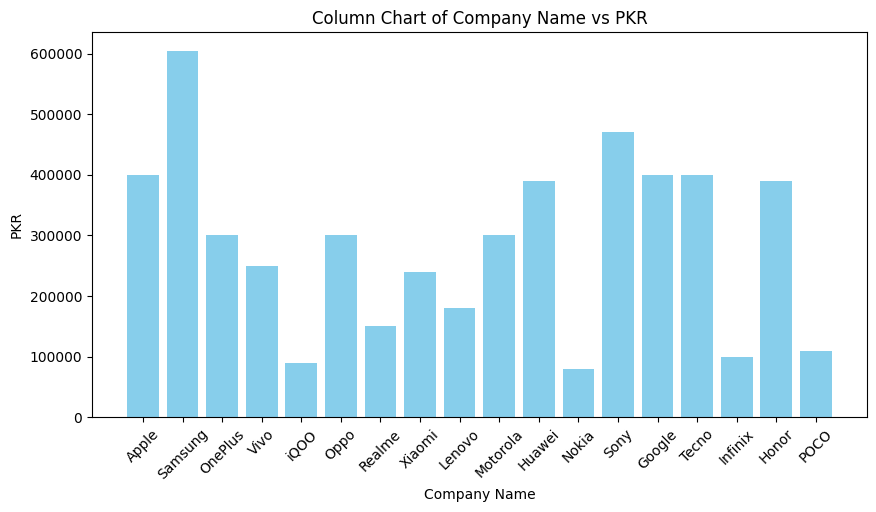

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(df["Company Name"], df["PKR"], color='skyblue')

plt.xlabel("Company Name")
plt.ylabel("PKR")
plt.title("Column Chart of Company Name vs PKR")
plt.xticks(rotation=45)  # Rotate x labels if necessary
plt.show()

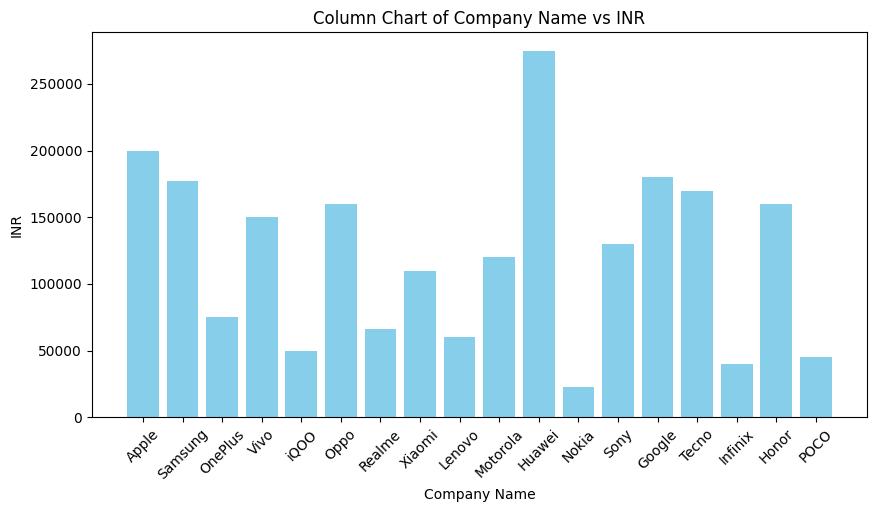

In [20]:
plt.figure(figsize=(10, 5))
plt.bar(df["Company Name"], df["INR"], color='skyblue')

plt.xlabel("Company Name")
plt.ylabel("INR")
plt.title("Column Chart of Company Name vs INR")
plt.xticks(rotation=45)  # Rotate x labels if necessary
plt.show()

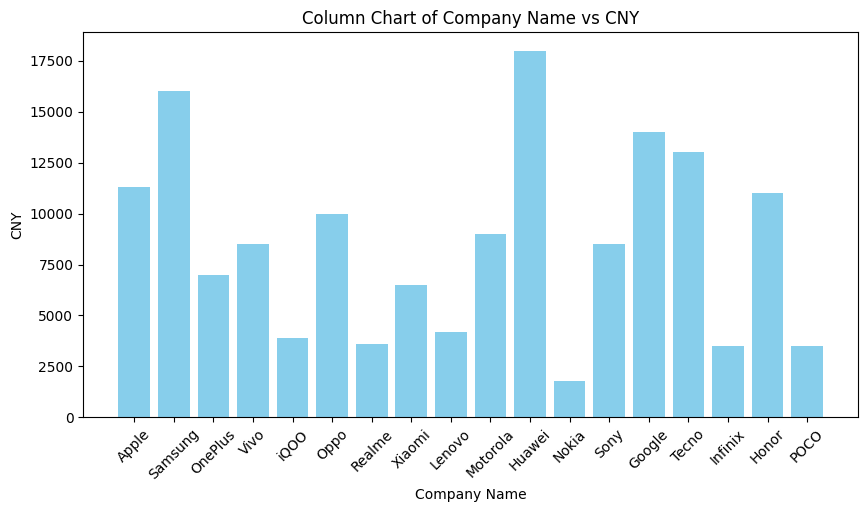

In [21]:
plt.figure(figsize=(10, 5))
plt.bar(df["Company Name"], df["CNY"], color='skyblue')

plt.xlabel("Company Name")
plt.ylabel("CNY")
plt.title("Column Chart of Company Name vs CNY")
plt.xticks(rotation=45)  # Rotate x labels if necessary
plt.show()

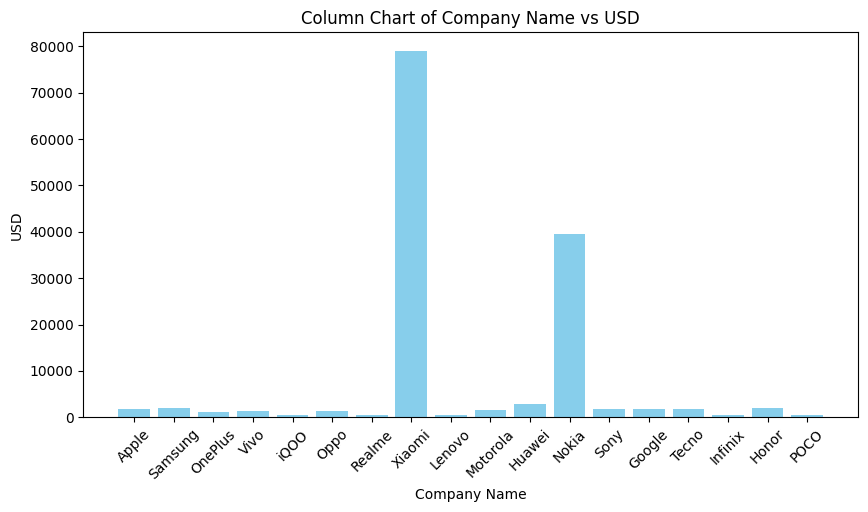

In [22]:
plt.figure(figsize=(10, 5))
plt.bar(df["Company Name"], df["USD"], color='skyblue')

plt.xlabel("Company Name")
plt.ylabel("USD")
plt.title("Column Chart of Company Name vs USD")
plt.xticks(rotation=45)  # Rotate x labels if necessary
plt.show()

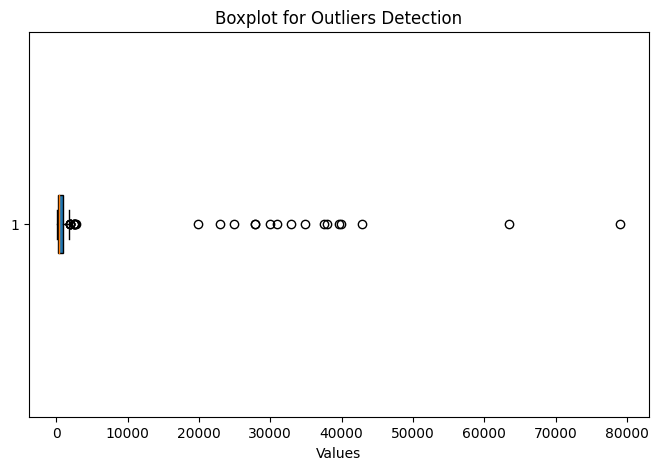

In [23]:
plt.figure(figsize=(8, 5))
plt.boxplot(df["USD"], vert=False, patch_artist=True)
plt.xlabel("Values")
plt.title("Boxplot for Outliers Detection")
plt.show()

In [24]:
new_df = df.copy()  # Create a new DataFrame
new_df = new_df[new_df["USD"] <= 10000]

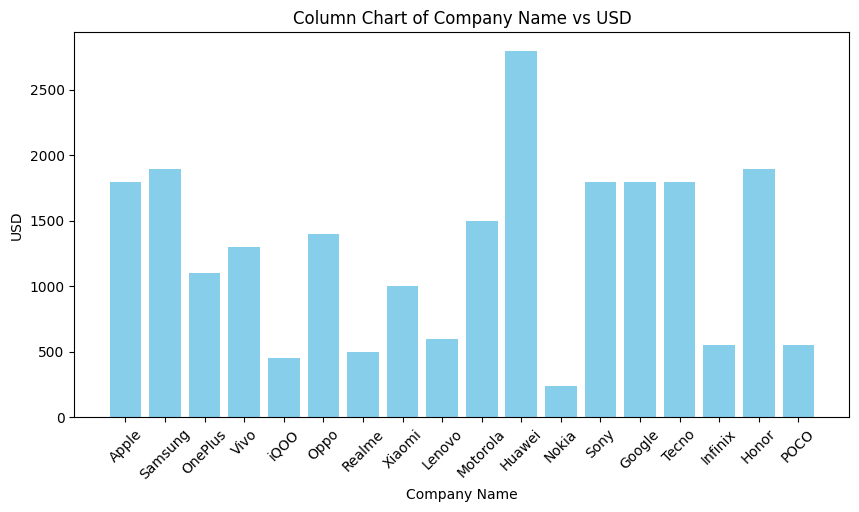

In [25]:
plt.figure(figsize=(10, 5))
plt.bar(new_df["Company Name"], new_df["USD"], color='skyblue')

plt.xlabel("Company Name")
plt.ylabel("USD")
plt.title("Column Chart of Company Name vs USD")
plt.xticks(rotation=45)  # Rotate x labels if necessary
plt.show()

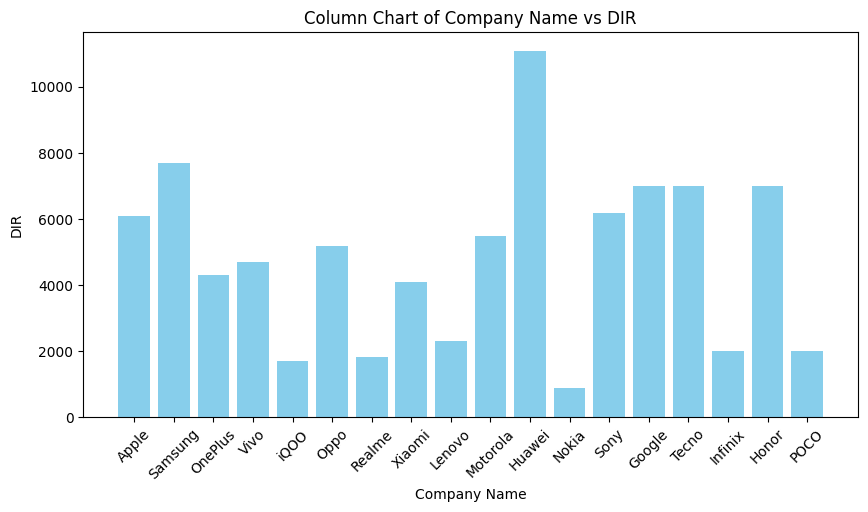

In [26]:
plt.figure(figsize=(10, 5))
plt.bar(df["Company Name"], df["DIR"], color='skyblue')

plt.xlabel("Company Name")
plt.ylabel("DIR")
plt.title("Column Chart of Company Name vs DIR")
plt.xticks(rotation=45)  # Rotate x labels if necessary
plt.show()

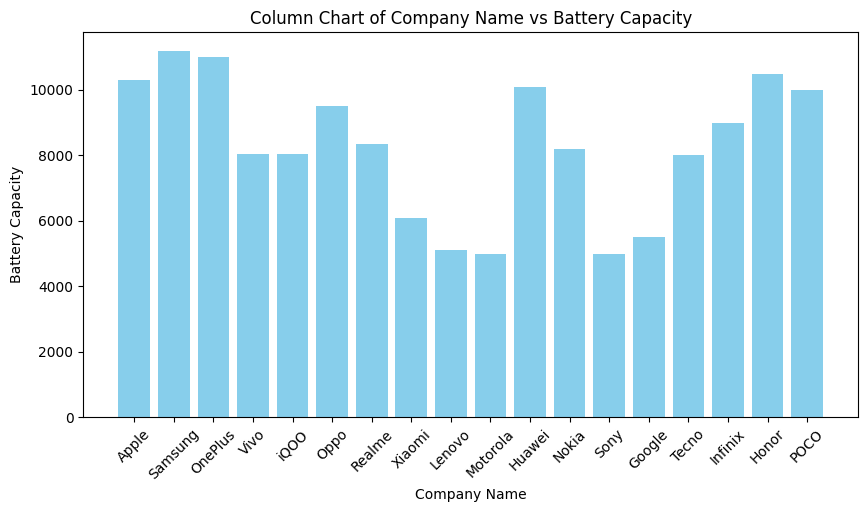

In [27]:
plt.figure(figsize=(10, 5))
plt.bar(df["Company Name"], df["Battery Capacity"], color='skyblue')

plt.xlabel("Company Name")
plt.ylabel("Battery Capacity")
plt.title("Column Chart of Company Name vs Battery Capacity")
plt.xticks(rotation=45)  # Rotate x labels if necessary
plt.show()

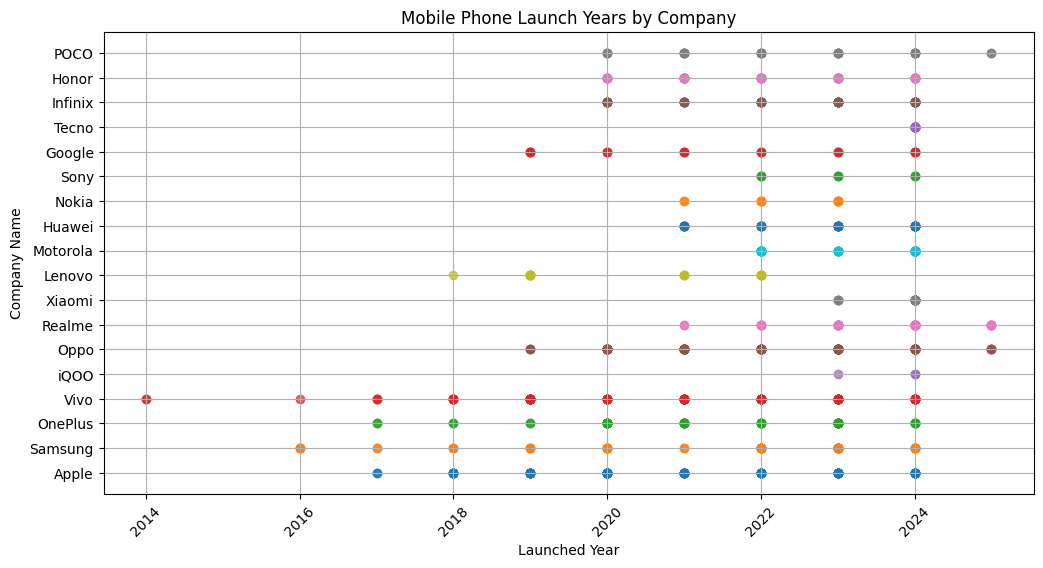

In [28]:
plt.figure(figsize=(12, 6))
for company in df["Company Name"].unique():
    subset = df[df["Company Name"] == company]
    plt.scatter(subset["Launched Year"], subset["Company Name"], label=company, alpha=0.7)

plt.xlabel("Launched Year")
plt.ylabel("Company Name")
plt.title("Mobile Phone Launch Years by Company")
plt.xticks(rotation=45)
plt.grid()
plt.show()

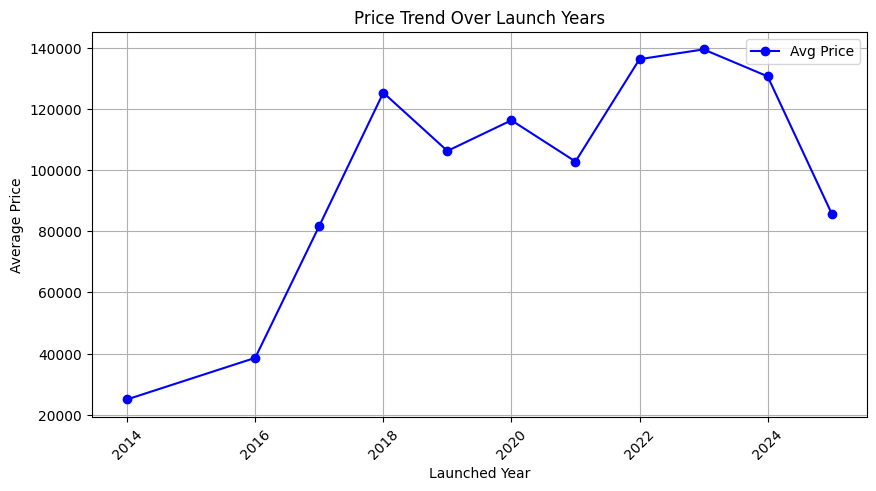

In [29]:
# Group by Launch Year and calculate the average price
df_grouped = df.groupby("Launched Year")["PKR"].mean()

# Plot line chart
plt.figure(figsize=(10, 5))
plt.plot(df_grouped.index, df_grouped.values, marker="o", linestyle="-", color="blue", label="Avg Price")

# Labels and title
plt.xlabel("Launched Year")
plt.ylabel("Average Price")
plt.title("Price Trend Over Launch Years")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()